In [215]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [216]:
X_train = pd.read_csv("/content/drive/MyDrive/X_train.csv")
X_valid = pd.read_csv("/content/drive/MyDrive/X_valid.csv")
X_test = pd.read_csv("/content/drive/MyDrive/X_test.csv")

y_train = pd.read_csv("/content/drive/MyDrive/y_train.csv")
y_valid = pd.read_csv("/content/drive/MyDrive/y_valid.csv")
y_test = pd.read_csv("/content/drive/MyDrive/y_test.csv")

In [217]:
def confusion_matrix_plot(y_test, y_pred, cmap):
    plt.figure(figsize=(4, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def scheduler_function(epoch, lr):
    if epoch < 5: # epoch 5 동안은 학습률 유지
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1)) # 그 뒤부터 학습률 감소

In [218]:
checkpoint_filepath = os.path.join(os.getcwd(), 'tf_model.keras')

In [219]:
checkpoint_filepath

'/content/tf_model.keras'

In [220]:
callbacks_list = [
    ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor='val_loss',
        save_best_only=True),

     EarlyStopping(
         monitor='val_accuracy',
         patience=5, mode = 'max',
         restore_best_weights=True),

     LearningRateScheduler(scheduler_function)
]

In [221]:
initializer = keras.initializers.HeNormal(seed = 42)

In [222]:
n_features = X_test.shape[1]

In [223]:
model = Sequential(name = 'tensorflow_model')
# 1) 입력
model.add(Input(shape=(n_features,)))

# 2) 첫 번째 블록
model.add(Dense(256, kernel_initializer=initializer, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dropout(0.1))

# 3) 두 번째 블록
model.add(Dense(128, kernel_initializer=initializer, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dropout(0.1))

# 4) 세 번째 블록
model.add(Dense(64, kernel_initializer=initializer, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dropout(0.1))

# 5) 네 번째 블록
model.add(Dense(32, kernel_initializer=initializer, use_bias=False))
# 필요하다면 Dropout 추가 가능

# 6) 출력
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [224]:
model.summary()

Model: "tensorflow_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 256)            │        32,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,089 (301.13 KB)

 Trainable params: 76,193 (297.63 KB)

 Non-trainable params: 896 (3.50 KB)

In [225]:
hist=model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, callbacks=callbacks_list)

Epoch 1/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7422 - loss: 0.5568 - val_accuracy: 0.7915 - val_loss: 0.4744 - learning_rate: 0.0010
Epoch 2/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7804 - loss: 0.4803 - val_accuracy: 0.7959 - val_loss: 0.4608 - learning_rate: 0.0010
Epoch 3/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7859 - loss: 0.4700 - val_accuracy: 0.7973 - val_loss: 0.4548 - learning_rate: 0.0010
Epoch 4/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7916 - loss: 0.4567 - val_accuracy: 0.7971 - val_loss: 0.4553 - learning_rate: 0.0010
Epoch 5/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7916 - loss: 0.4596 - val_accuracy: 0.7984 - val_loss: 0.4516 - learning_rate: 0.0010
Epoch 6/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7937 - loss: 0.4574 - val_accuracy: 0.7986 - val_loss: 0.4491 - learning_rate: 9.0484e-04
Epoch 7/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7986 - los

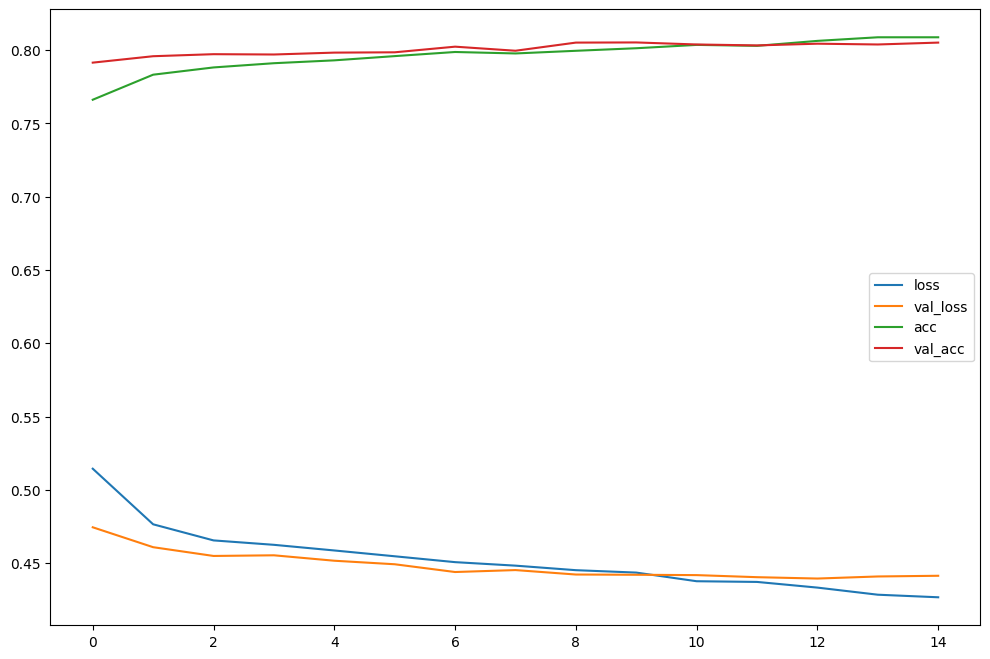

In [226]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','acc','val_acc'])
plt.show()

In [227]:
model.save('/content/drive/MyDrive/tf_model.keras')

In [228]:
score=model.evaluate(X_test,y_test)

293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4459


In [229]:
y_pred = model.predict(X_test)

293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [230]:
y_pred

array([[0.13016567],
       [0.58749896],
       [0.85488534],
       ...,
       [0.6677252 ],
       [0.15954442],
       [0.09493171]], dtype=float32)

In [231]:
y_pred = np.where(y_pred >= 0.5, 1, 0)  # 0.5를 기준으로 이진 분류

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      6353
           1       0.72      0.63      0.67      3007

    accuracy                           0.80      9360
   macro avg       0.77      0.75      0.76      9360
weighted avg       0.80      0.80      0.80      9360



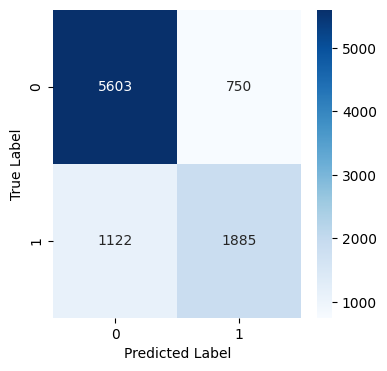

In [233]:
confusion_matrix_plot(y_test, y_pred, cmap="Blues")

In [ ]:
# valid set에서 임곗값 찾기

In [234]:
proba = model.predict(X_valid)

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [235]:
fpr, tpr, thresholds = roc_curve(y_valid, proba, drop_intermediate=False)

In [236]:
# |TPR - TNR| 최소 threshold
tnr = 1 - fpr
idx = np.argmin(np.abs(tpr - tnr))
t1 = thresholds[idx]

# Balanced Accuracy 최대 threshold
ba = (tpr + tnr) / 2
idx_ba = np.argmax(ba)
t2 = thresholds[idx_ba]

In [237]:
print(t1)
print(t2)

0.31082946
0.32855242


In [238]:
test_proba = model.predict(X_test)

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [241]:
# valid set에서 찾은 임곗값을 test set에 적용
y_pred_t1 = (test_proba >= t1).astype(int)
y_pred_t2 = (test_proba >= t2).astype(int)

print(classification_report(y_test, y_pred_t1))
print(classification_report(y_test, y_pred_t2))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6353
           1       0.62      0.78      0.69      3007

    accuracy                           0.78      9360
   macro avg       0.75      0.78      0.76      9360
weighted avg       0.80      0.78      0.78      9360

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      6353
           1       0.63      0.77      0.69      3007

    accuracy                           0.78      9360
   macro avg       0.75      0.78      0.76      9360
weighted avg       0.80      0.78      0.78      9360



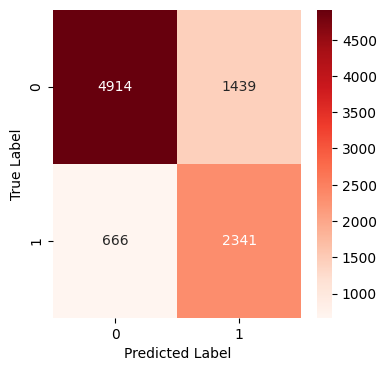

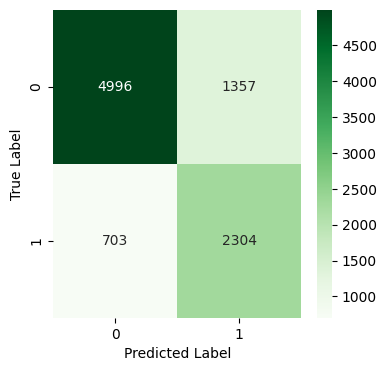

In [240]:
confusion_matrix_plot(y_test, y_pred_t1, cmap="Reds")
confusion_matrix_plot(y_test, y_pred_t2, cmap="Greens")